# 지도 학습 _ supervised learning
- 밀 품종

In [1]:
from preamble import*
%matplotlib inline

In [2]:
# 워터마크 패키지를 로딩 & 버전 확인
%load_ext watermark
%watermark -v -p sklearn,numpy,scipy,matplotlib

Python implementation: CPython
Python version       : 3.7.6
IPython version      : 7.12.0

sklearn   : 0.24.1
numpy     : 1.19.5
scipy     : 1.4.1
matplotlib: 3.1.3



In [14]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

### 파일 불러오기. 가장 중요!

In [3]:
# 같은 폴더에 둬야함
redata = pd.read_csv("seeds_dataset.csv") 

In [4]:
# https://archive.ics.uci.edu/ml/datasets/seeds#
# Attribute Information:

# To construct the data, seven geometric parameters of wheat kernels were measured: 
#1. area A, 
#2. perimeter P, 
#3. compactness C = 4*pi*A/P^2, 
#4. length of kernel, 
#5. width of kernel, 
#6. asymmetry coefficient 
#7. length of kernel groove. 
#All of these parameters were real-valued continuous.

# 측정 값은 7 가지
# 마지막 8번째가 3가지 품종(Kama, Rosa and Canadian)을 나타내는 1,2,3 중 하나의 값이 들어 있습니다.

wheat_dataset = pd.DataFrame(redata)

### 데이터 확인

In [5]:
# column 나열
print("wheat_dataset의 key: {}".format(wheat_dataset.keys()))

wheat_dataset의 key: Index(['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry',
       'length.1', 'breed'],
      dtype='object')


In [6]:
# 데이터 구조 출력
# 210개의 데이터와 각각 8개의 피쳐를 갖음
print("wheat_dataset의 크기: {}".format(wheat_dataset.shape))

wheat_dataset의 크기: (210, 8)


In [7]:
# 처음 다섯 개의 데이터 확인
print("wheat_dataset의 처음 다섯 행:\n{}".format(wheat_dataset[:5]))

wheat_dataset의 처음 다섯 행:
    area  perimeter  compactness  length  width  asymmetry  length.1  breed
0  15.26      14.84         0.87    5.76   3.31       2.22      5.22      1
1  14.88      14.57         0.88    5.55   3.33       1.02      4.96      1
2  14.29      14.09         0.91    5.29   3.34       2.70      4.83      1
3  13.84      13.94         0.90    5.32   3.38       2.26      4.80      1
4  16.14      14.99         0.90    5.66   3.56       1.35      5.17      1


In [8]:
# 전체 피쳐를 다 보지 않고 특정 피쳐에 대한 값만 보고 싶을 때 활용!
# 현재는 breed값을 빼고 싶음!
# 그래서 wheat_dataset의 전체 행, 0~7열을 추출하여 datas에 따로 저장함.

datas = wheat_dataset.iloc[:,0:7]
print("datas 의 처음 다섯 행:\n{}".format(datas[:5])) #콤마 없으므로 0~5행까지 전체 column출력
#그런데 전체 column에서 미리 따로 일부(0~7)를 뽑아서 datas에 저장했으므로 0~5행을 0~7열에 대해 출력

datas 의 처음 다섯 행:
    area  perimeter  compactness  length  width  asymmetry  length.1
0  15.26      14.84         0.87    5.76   3.31       2.22      5.22
1  14.88      14.57         0.88    5.55   3.33       1.02      4.96
2  14.29      14.09         0.91    5.29   3.34       2.70      4.83
3  13.84      13.94         0.90    5.32   3.38       2.26      4.80
4  16.14      14.99         0.90    5.66   3.56       1.35      5.17


In [9]:
#210개의 데이터 중에서 품종(breed) 값 따로 저장
answer = wheat_dataset['breed']

#부분 출력
print("breed = 1의 처음 3개 행:\n{}".format(answer[:3]))
print("\n")
print("breed = 2의 처음 3개 행:\n{}".format(answer[107:110]))
print("\n")
print("breed = 3의 처음 3개 행:\n{}".format(answer[207:]))

breed = 1의 처음 3개 행:
0    1
1    1
2    1
Name: breed, dtype: int64


breed = 2의 처음 3개 행:
107    2
108    2
109    2
Name: breed, dtype: int64


breed = 3의 처음 3개 행:
207    3
208    3
209    3
Name: breed, dtype: int64


### 데이터 분리

In [10]:
from sklearn.model_selection import train_test_split
datas_train, datas_test, answer_train, answer_test = train_test_split(datas, answer, random_state=0)

In [11]:
# train set
print("datas_train 크기: {}".format(datas_train.shape)) #datas
print("answer_train 크기: {}".format(answer_train.shape)) #breed(answer)

datas_train 크기: (157, 7)
answer_train 크기: (157,)


In [12]:
# test set
print("datas_test 크기: {}".format(datas_test.shape))
print("answer_test 크기: {}".format(answer_test.shape))

datas_test 크기: (53, 7)
answer_test 크기: (53,)


### 산점도

In [16]:
# 훈련 데이터들이 행, 각각의 feature가 열로 들어가는 dataframe 생성
seed_dataframe = pd.DataFrame(datas_train, columns=datas.keys())
seed_dataframe

,area,perimeter,compactness,length,width,asymmetry,length.1
198,12.62,13.67,0.85,5.41,2.91,3.31,5.23
8,16.63,15.46,0.87,6.05,3.46,2.04,5.88
40,13.54,13.85,0.89,5.35,3.16,2.59,5.18
109,18.55,16.22,0.89,6.15,3.67,1.74,5.89
126,18.65,16.41,0.87,6.29,3.59,4.39,6.10
...,...,...,...,...,...,...,...
67,14.01,14.29,0.86,5.61,3.16,2.22,5.13
192,11.87,13.02,0.88,5.13,2.95,3.60,5.13
117,19.15,16.45,0.89,6.25,3.81,3.08,6.18
47,14.99,14.56,0.89,5.57,3.38,2.96,5.17


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029008760E08>,
      dtype=object)

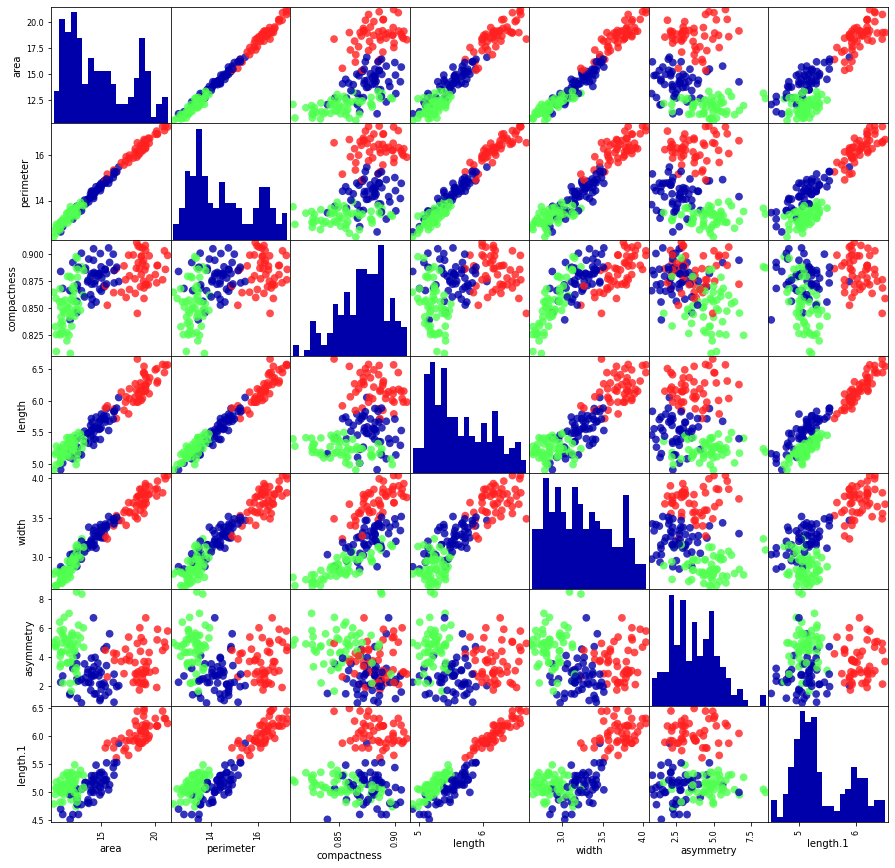

In [17]:
# 산점도. dataframe을 그림. 색 구분은 3개의 answer 값 대로.
pd.plotting.scatter_matrix(seed_dataframe, c=answer_train, figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [18]:
# 구현된 알고리즘(knn 에스티메이터)를 활용하여 훈련할 객체를 생성
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [19]:
# 훈련
knn.fit(datas_train, answer_train)

KNeighborsClassifier(n_neighbors=1)

In [20]:
# 평가. score method 사용
# print("{:}".format(knn.predict(datas_test) == answer_test)) #결과비교
print("테스트 정확도: {:.2f}".format(knn.score(datas_test, answer_test)))

테스트 정확도: 0.89


In [21]:
# 데이터 만들어서 넣어봄
datas_new = np.array([[11.84,13.21,0.8521,5.175,2.836,3.598,5.044]]) # 208번 데이터 정답은 3 
print("X_new.shape: {}".format(datas_new.shape))

prediction = knn.predict(datas_new) # 실전에 적용하여 사용할 경우 측정 값을 넣으면 예측 값이 나옴
print("prediction =", prediction) # 예측 값과 정답이 일치 
print("prediction.shape: {}".format(prediction.shape))

X_new.shape: (1, 7)
prediction = [3]
prediction.shape: (1,)


In [22]:
answer_pred = knn.predict(datas_test) # test data들에 대한 예측 값 출력 
print("테스트 세트에 대한 예측값:\n {}".format(answer_pred ))

테스트 세트에 대한 예측값:
 [1 2 1 1 3 2 2 2 2 3 1 3 1 3 2 2 3 2 1 1 3 1 1 1 2 1 2 1 3 3 2 3 2 2 3 3 3
 2 3 1 3 1 2 3 1 2 2 1 3 2 1 2 3]
